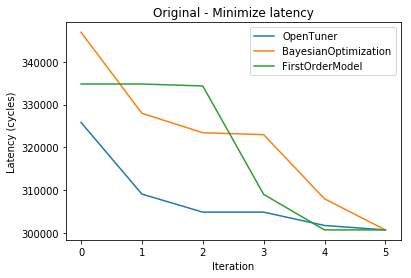

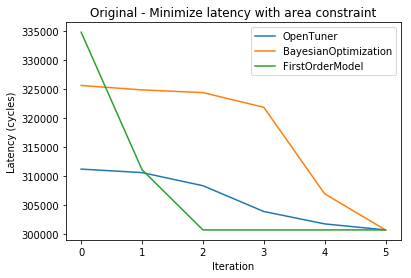

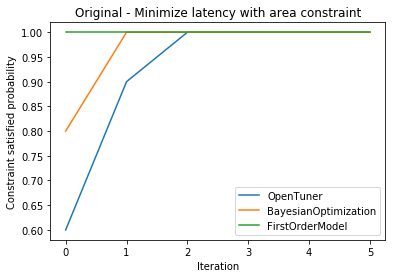

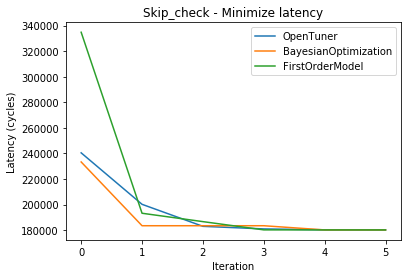

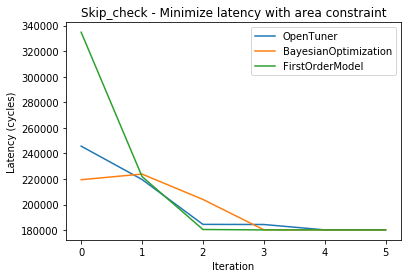

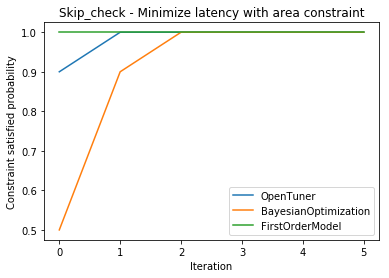

In [139]:
import glob, math, os, sqlite3
from pickle import loads
import numpy as np
import matplotlib.pyplot as plt

latency_map = {1: 334827, 2: 300677, 4: 311077, 8: 332517, 16: 377957, 32: 479077}
max_iter = 10
max_luts = 4500
test = '/proj/xsjhdstaff5/hansg/Tests/XXX'
techniques = ['OpenTuner', 'BayesianOptimization', 'FirstOrderModel']
for source in ['Original', 'Skip_check']:
    for technique in techniques:
        all_latencies = []
        lengths = []
        for repetition in range(1, max_iter + 1):
            db_file = os.path.join(test, 'Results', source, technique, 'MinLat', str(repetition), 'HLS_tuner.db')
            conn = sqlite3.connect(db_file)
            conn.row_factory = sqlite3.Row
            cur = conn.cursor()
            cur.execute("select run_time, data from result inner join configuration on result.configuration_id = configuration.id;")
            rows = cur.fetchall()
            latencies = []
            factors = []
            for row in rows:
                factor = list(loads(row['data']).values())[0]
                if source == 'Original':
                    # Hack because I read the wrong numbers from the HLS reports.
                    latencies.append(latency_map[factor])
                else:
                    latencies.append(row['run_time'])
                factors.append(factor)
            conn.close()
            lengths.append(len(latencies))
            min_latencies = list(np.minimum.accumulate(latencies))
            all_latencies.append(min_latencies)
        max_length = max(lengths)
        for latencies in all_latencies:
            if len(latencies) < max_length:
                latencies.append(latencies[-1] * (max_length - len(latencies)))
        avg_min_latencies = np.mean(np.array(all_latencies), axis = 0)
        plt.plot(range(len(latencies)), avg_min_latencies)
    plt.title('{} - Minimize latency'.format(source))
    plt.xlabel('Iteration')
    plt.ylabel('Latency (cycles)')
    #plt.yscale('log')
    #plt.xlim(0, max_len + 1)
    plt.legend(techniques)
    plt.show()        

    for technique in techniques:
        all_latencies = []
        lengths = []
        for repetition in range(1, max_iter + 1):
            db_file = os.path.join(test, 'Results', source, technique, 'MinLatConstrArea', str(repetition), 'HLS_tuner.db')
            conn = sqlite3.connect(db_file)
            conn.row_factory = sqlite3.Row
            cur = conn.cursor()
            cur.execute("select run_time, data, luts from result inner join configuration on result.configuration_id = configuration.id;")
            rows = cur.fetchall()
            latencies = []
            min_latency = float('inf')
            for row in rows:
                factor = list(loads(row['data']).values())[0]
                if source == 'Original':
                    # Hack because I read the wrong numbers from the HLS reports.
                    latency = latency_map[factor]
                else:
                    latency = row['run_time']
                if row['luts'] <= max_luts:
                    min_latency = min(min_latency, latency)
                latencies.append(min_latency)
            conn.close()
            lengths.append(len(latencies))
            all_latencies.append(latencies)
            
        max_length = max(lengths)
        avg_latencies = []
        for i in range(max_length):
            l = []
            for latencies in all_latencies:
                latency = latencies[i] if i < len(latencies) else latencies[-1]
                if not math.isinf(latency):
                    l.append(latency)
            avg_latencies.append(np.mean(l))
            
        plt.plot(range(max_length), avg_latencies)
    plt.title('{} - Minimize latency with area constraint'.format(source))
    plt.xlabel('Iteration')
    plt.ylabel('Latency (cycles)')
    #plt.yscale('log')
    #plt.xlim(0, max_len + 1)
    plt.legend(techniques)
    plt.show()
    
    for technique in techniques:
        all_area_probs = []
        lengths = []
        for repetition in range(1, max_iter + 1):
            db_file = os.path.join(test, 'Results', source, technique, 'MinLatConstrArea', str(repetition), 'HLS_tuner.db')
            conn = sqlite3.connect(db_file)
            conn.row_factory = sqlite3.Row
            cur = conn.cursor()
            cur.execute("select run_time, data, luts from result inner join configuration on result.configuration_id = configuration.id;")
            rows = cur.fetchall()
            area_probs = []
            max_prob = 0.0
            for row in rows:
                if row['luts'] <= max_luts:
                    max_prob = 1.0
                area_probs.append(max_prob)
            conn.close()
            lengths.append(len(area_probs))
            all_area_probs.append(area_probs)
            
        avg_area_probs = []
        for i in range(max_length):
            l = []
            for area_probs in all_area_probs:
                prob = area_probs[i] if i < len(area_probs) else area_probs[-1]
                l.append(prob)
            avg_area_probs.append(np.mean(l))
            
        plt.plot(range(max_length), avg_area_probs)
    plt.title('{} - Minimize latency with area constraint'.format(source))
    plt.xlabel('Iteration')
    plt.ylabel('Constraint satisfied probability')
    #plt.yscale('log')
    #plt.xlim(0, max_len + 1)
    plt.legend(techniques)
    plt.show()        

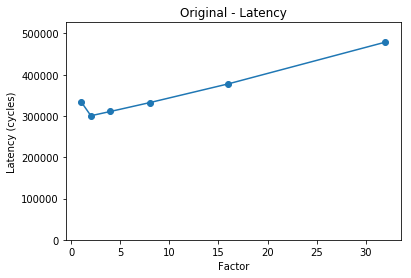

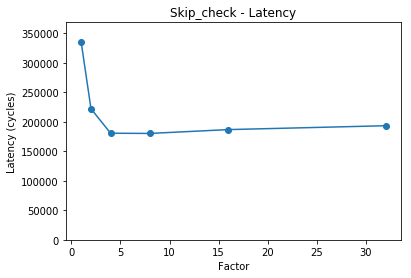

In [137]:
import glob, math, os, sqlite3
from pickle import loads
import numpy as np
import matplotlib.pyplot as plt

latency_map = {1: 334827, 2: 300677, 4: 311077, 8: 332517, 16: 377957, 32: 479077}
max_luts = 4500
test = '/proj/xsjhdstaff5/hansg/Tests/XXX'
sources = ['Original', 'Skip_check']
for source in sources:
    db_file = os.path.join(test, 'Results', source, 'OpenTuner/MinLat/1/HLS_tuner.db')
    conn = sqlite3.connect(db_file)
    conn.row_factory = sqlite3.Row
    cur = conn.cursor()
    cur.execute("select run_time, data from result inner join configuration on result.configuration_id = configuration.id;")
    rows = cur.fetchall()
    latencies = []
    factors = []
    for row in rows:
        factor = list(loads(row['data']).values())[0]
        if source == 'Original':
            # Hack because I read the wrong numbers from the HLS reports.
            latencies.append(latency_map[factor])
        else:
            latencies.append(row['run_time'])
        factors.append(factor)
    conn.close()
    factors, latencies = zip(*sorted(zip(factors, latencies)))
    plt.plot(factors, latencies, marker = 'o')
    plt.title('{} - Latency'.format(source))
    plt.ylim(0, 1.1 * max(latencies))
    plt.xlabel('Factor')
    plt.ylabel('Latency (cycles)')
    plt.show()